In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import time

start_time = time.time()

In [ ]:
# Create path to Prepared data folder
path_prepared = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\02 Data\Prepared data'

In [ ]:
# Create path to 'Visualizations' folder
path_visualizations = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

In [ ]:
# Create path to Original data folder
path_original = r'C:\Users\danie\Desktop\career Foundry\31-03-2023 Instacart Basket Analysis\02 Data\Original data'

In [ ]:
# Import Instacart_data_set file
df_final = pd.read_pickle(os.path.join(path_prepared, 'instacart_data_set.pkl'))

In [ ]:
df_final['spender_flag'].value_counts()

In [ ]:
df_final.shape

In [ ]:
# Removing PII data to address security implications

df_final.drop(columns = ['first_name', 'surname'], inplace = True)

In [ ]:
#Verifying columns removal

df_final.columns

In [ ]:
#Regional Segmentation, new column 'region' using df.loc[df.A.isin([]), '']

df_final.loc[df_final.state.isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
df_final.loc[df_final.state.isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
df_final.loc[df_final.state.isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'
df_final.loc[df_final.state.isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'

In [ ]:
#Check Data consistency
df_final['region'].value_counts(dropna = False)

In [ ]:
#Create df_region_spend using .crosstab() to select the necessary data.
df_region_spend = pd.crosstab(df_final['region'], df_final['spender_flag'], dropna = False)

In [ ]:
df_region_spend

In [ ]:
df_region_spend.describe()

In [ ]:
#Creating 'exclusion_flag' based on customers order activity

result = []

for x in df_final['max_orders']:
    if x < 5:
        result.append('Low activity')
    else:
        result.append('High activity')

df_final['exclusion_flag'] = result

In [ ]:
df_final['exclusion_flag'].value_counts()

In [ ]:
# Creating a subset of high order customer

df_high_act_profiles = df_final.drop(df_final[df_final.exclusion_flag == 'Low activity'].index)

In [ ]:
df_high_act_profiles.shape

In [ ]:
#Export DataFrame with exclusion flag
df_high_act_profiles.to_pickle(os.path.join(path_prepared, 'instacart_data_set_with_exclusion.pkl'))

## Profiling Customer in Database

### Age profiling

In [ ]:
#Grouping customers by age using .quantile() as form of division

q_1 = df_final.age.quantile(0.25)
q_2 = df_final.age.quantile(0.50)
q_3 = df_final.age.quantile(0.75)

q_1, q_2, q_3 

In [ ]:
#Grouping customers usin 'for_in' and 'if else' functions
young = []

for x in df_final['age']:
    if x <= q_1:
        young.append('18-33')
    elif x > q_1 and x <= q_2:
        young.append('34-49')
    elif x > q_2 and x <= q_3:
        young.append('50-65')
    elif x > q_3:
        young.append('66+')
    else:
        young.append('Unkonwn')

df_final['age_range'] = young

df_final['age_range'].value_counts()

### Age-Region Crosstab for visualization

In [ ]:
#Defining df with age and region
age_region = pd.crosstab(df_final['region'], df_final['age_range'])

In [ ]:
barh_age_region = age_region.plot.barh(color = sns.color_palette('Oranges', 4))
plt.title('Age group population by region', fontweight = 'bold')
plt.xlabel('Frequency')

In [ ]:
#Age-region summary
age_region.describe()

### Import Department Data set

In [ ]:
# Import Department Data set
df_dept = pd.read_csv(os.path.join(path_prepared, 'departments_wrangled.csv'))

In [ ]:
df_dept.head()

In [ ]:
#Rename columns with a self-descriptive name
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [ ]:
df_dept.head()

### Merge Department Data set with the main Data set

In [ ]:
#Using .merge() funtion to merge data sets
df_final = df_final.merge(df_dept, on = 'department_id')

In [ ]:
df_final.head()

### Price range and age range correlation

In [31]:
#Use .crosstab() funtion 
age_spenditure = pd.crosstab(df_final['price_range_loc'], df_final['age_range'])

Text(0, 0.5, 'Price Range')

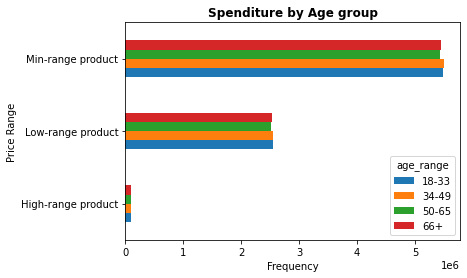

In [32]:
age_spend = age_spenditure.plot.barh()
plt.title('Spenditure by Age group', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('Price Range')

### Department and age range correlation

In [33]:
age_department = pd.crosstab(df_final['department'], df_final['age_range'])

Text(0, 0.5, 'Department')

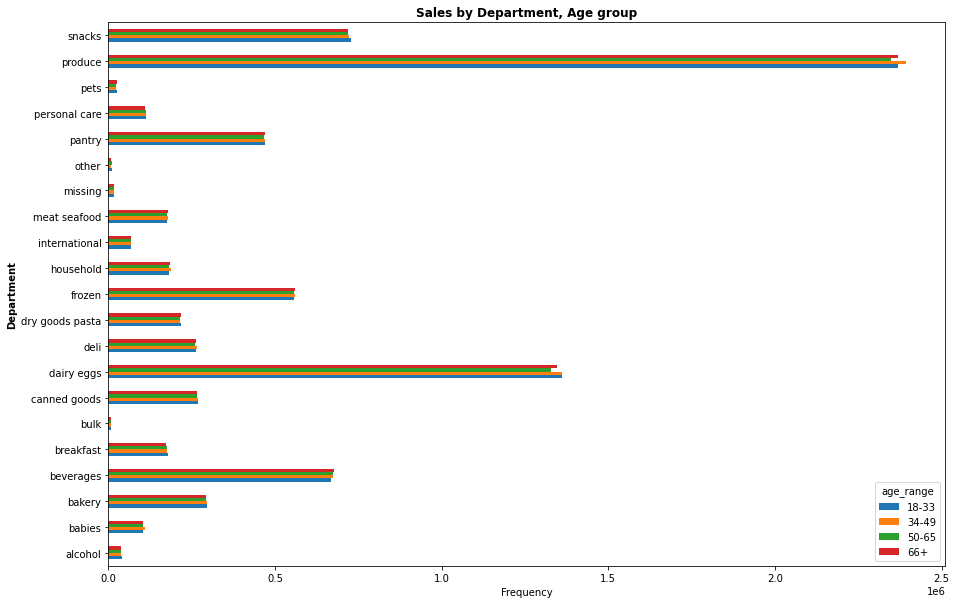

In [34]:
plt.rcParams['figure.figsize'] = [15, 10]
age_dept = age_department.plot.barh()
plt.title('Sales by Department, Age group', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('Department',fontweight = 'bold')

### Orders day of the week and age range correlation

In [35]:
age_day = pd.crosstab(df_final['orders_day_of_the_week'], df_final['age_range']).loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

Text(0, 0.5, 'Day of the week')

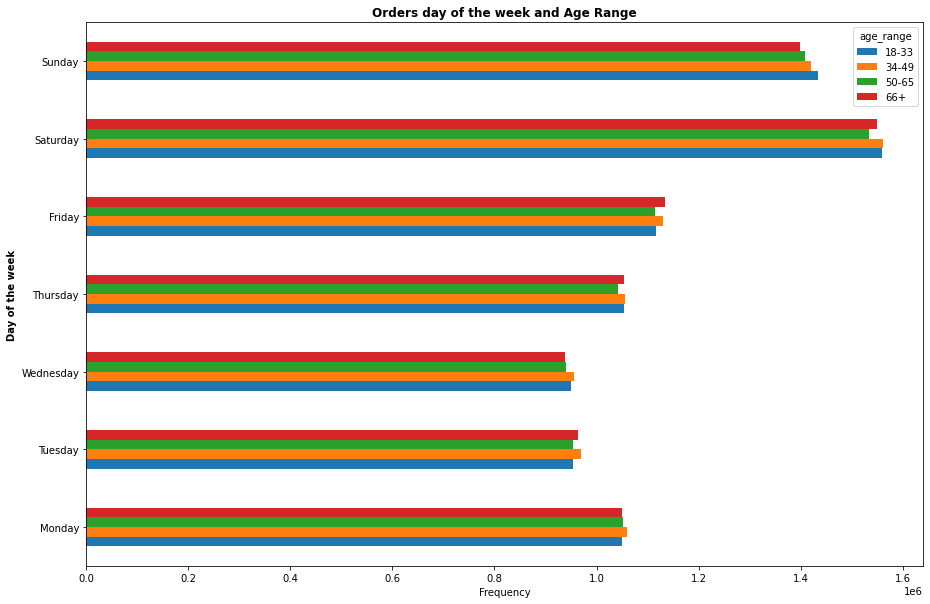

In [36]:
age_days = age_day.plot.barh()
plt.title('Orders day of the week and Age Range', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('Day of the week',fontweight = 'bold')

## Family Size Profiling

## Grouping Customers based on Number of dependents

In [37]:
#Using 'for in' funtion
parent = []

for y in df_final['number_of_kids']:
    
    if y ==  0:
        parent.append('Single adult')
    elif y == 1:
        parent.append('Reg family, 1 depnds')
    elif y == 2:
        parent.append('Reg family, 2 depnds')
    else:
        parent.append('Big family, 3+ depnds')

df_final['Family_size'] = parent

In [38]:
#Count of customers based on family size
df_final['Family_size'].value_counts()

Big family, 3+ depnds    8133827
Single adult             8096275
Reg family, 2 depnds     8089749
Reg family, 1 depnds     8079881
Name: Family_size, dtype: int64

### Orders day of the week, age range, Family size comparison

In [39]:
age_cross = pd.crosstab(df_final['orders_day_of_the_week'], [df_final['Family_size'], df_final['age_range']]).loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

Text(0, 0.5, 'Day of the week')

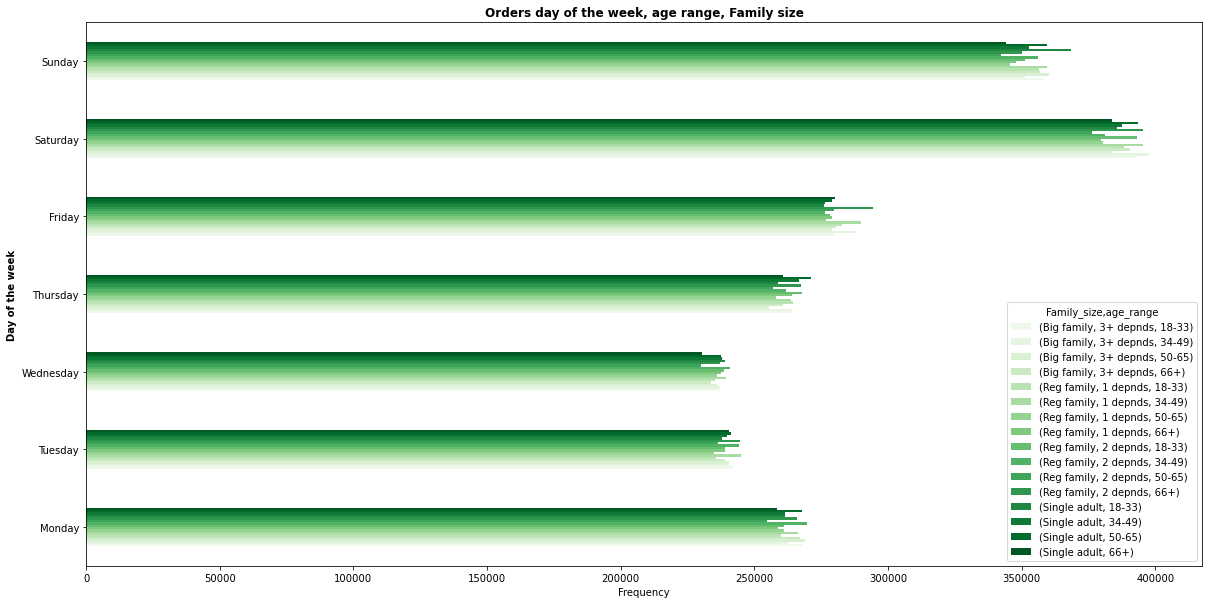

In [40]:
plt.rcParams['figure.figsize'] = [20, 10]
age_size_day = age_cross.plot.barh(color = sns.color_palette('Greens', 16))
plt.title('Orders day of the week, age range, Family size', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('Day of the week',fontweight = 'bold')

### Orders Hour of the Day-Age range-Family size comparison

In [41]:
size_age_hour = pd.crosstab(df_final['order_hour_of_day'], [df_final['Family_size'], df_final['age_range']])

Text(0, 0.5, 'Hour of the Day')

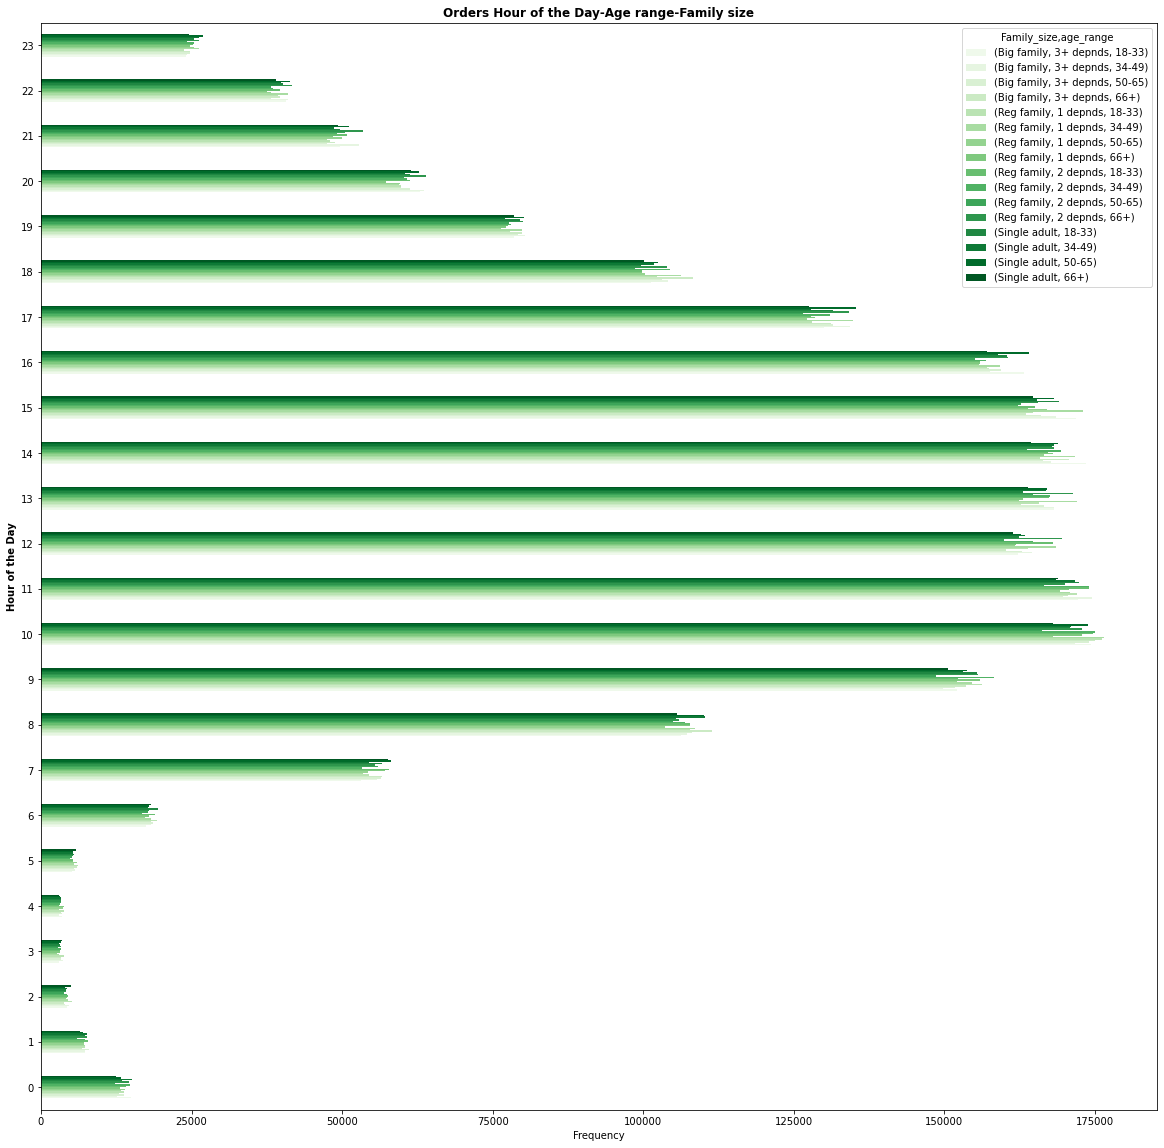

In [42]:
plt.rcParams['figure.figsize'] = [20, 20]
age_size_hour = size_age_hour.plot.barh(color = sns.color_palette('Greens', 16))
plt.title('Orders Hour of the Day-Age range-Family size', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('Hour of the Day',fontweight = 'bold')

### Sales comparison between Departments based on Family size 

In [43]:
dept_size = pd.crosstab(df_final['department'], [df_final['Family_size']])

Text(0, 0.5, 'Department')

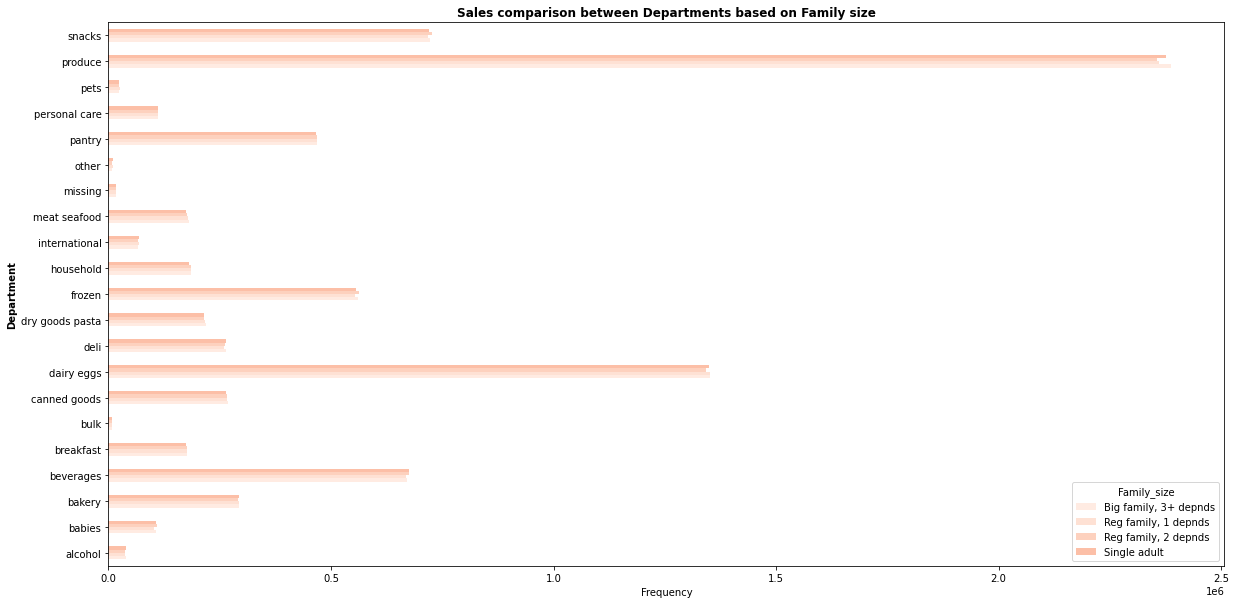

In [44]:
plt.rcParams['figure.figsize'] = [20, 10]
size_dept = dept_size.plot.barh(color = sns.color_palette('Reds', 16))
plt.title('Sales comparison between Departments based on Family size', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('Department',fontweight = 'bold')

### Sales Comparison Age ranges, Family Sizes based on Departments

Text(0.5, 0, 'Summary, MEAN, MAX,...')

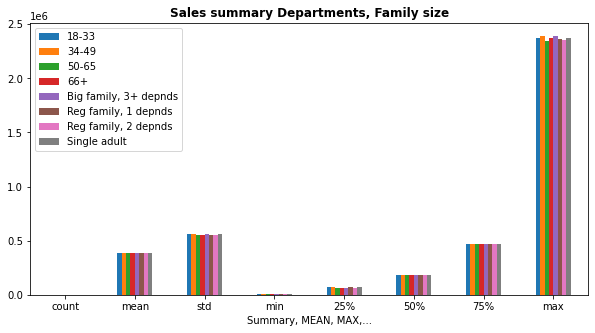

In [45]:
plt.rcParams['figure.figsize'] = [10, 5]
bars = pd.concat([age_department, dept_size]).describe().plot.bar(rot=0)
plt.title('Sales summary Departments, Family size', fontweight = 'bold')
plt.xlabel('Summary, MEAN, MAX,...')

***Summary chart Age ranged & Family Sizes Comparison based on Departments***

###  Sales Comparison between Regions based on Departments 

In [46]:
dept_region = pd.crosstab(df_final['department'], [df_final['region']])

Text(0, 0.5, 'Department')

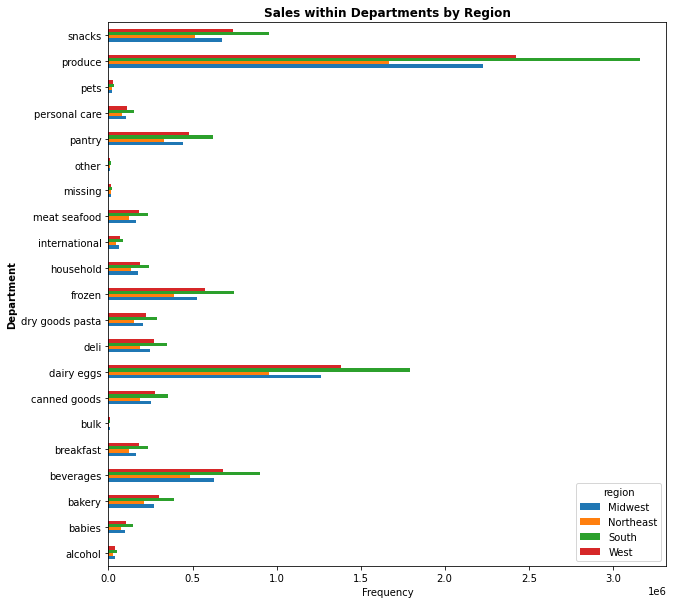

In [47]:
plt.rcParams['figure.figsize'] = [10, 10]
region_dept = dept_region.plot.barh()
plt.title('Sales within Departments by Region', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('Department',fontweight = 'bold')


# Income Profiling

In [48]:
#Summary 'Income'
df_final['income'].describe()


count    3.239973e+07
mean     9.941685e+04
std      4.300669e+04
min      2.590300e+04
25%      6.699600e+04
50%      9.660800e+04
75%      1.278840e+05
max      5.939010e+05
Name: income, dtype: float64

## Grouping Customers based on their income

In [49]:
#Grouping Customers based on Number of dependents
#Using .quantile() funtions as reference for the division

low = df_final.income.quantile(0.25)
median = df_final.income.quantile(0.50)
high = df_final.income.quantile(0.75)
in_group = []

for i in df_final['income']:
    if i < low:
        in_group.append('Low income')
    elif i >= low and i < median:
        in_group.append('Low-avg income')
    elif i >= median and i < high:
        in_group.append('High-avg income')
    elif i >= high:
        in_group.append('High income')
    else:
        in_group.append('Unknown')
        

In [50]:
#Creating income flag
df_final['income_group'] = in_group

In [51]:
df_final['income_group'].value_counts()

High-avg income    8101031
High income        8100029
Low income         8099910
Low-avg income     8098762
Name: income_group, dtype: int64

## Customers income group per Region

In [52]:
#Use .crosstab() function 
income_region = pd.crosstab(df_final['region'], df_final['income_group'])

Text(0.5, 0, 'Region')

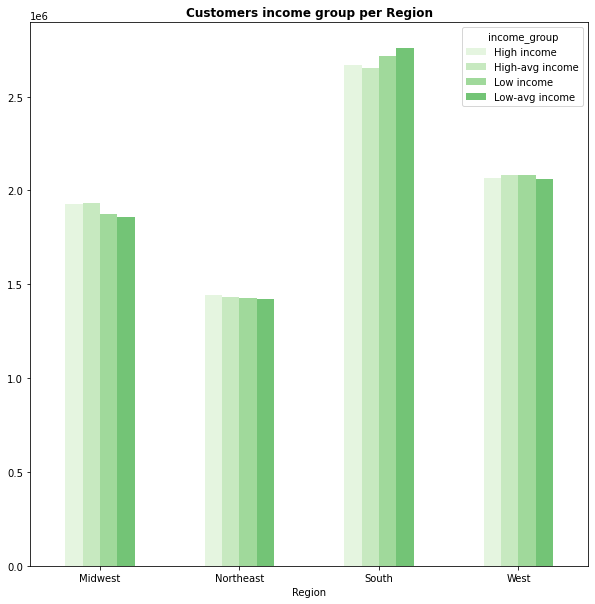

In [53]:
region_income = income_region.plot.bar(color = sns.color_palette('Greens', 7), rot = 0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.title('Customers income group per Region', fontweight = 'bold')
plt.xlabel('Region')

### Sales Comparison between regions based on Price range

In [54]:
region_prices = pd.crosstab(df_final['price_range_loc'], df_final['region'])

Text(0.5, 0, 'Price Range')

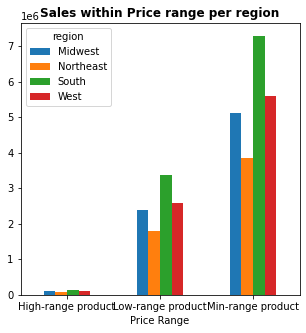

In [55]:
price_region = region_prices.plot.bar(rot=0)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Sales within Price range per region', fontweight = 'bold')
plt.xlabel('Price Range')

### Sales Comparison between Income groups based on Price range

In [56]:
income_prices = pd.crosstab(df_final['income_group'], df_final['price_range_loc'])

Text(0, 0.5, '')

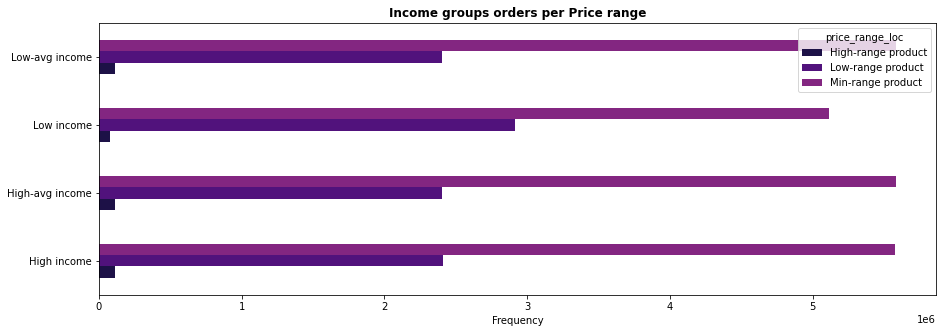

In [57]:
inc = income_prices.plot.barh(color = sns.color_palette('magma', 7))
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Income groups orders per Price range', fontweight = 'bold')
plt.xlabel('Frequency')
plt.ylabel('')

***Mid-range-price products purshased has the highest sales in each customer group. The chart shows small purshases behabior in Low Income group, where they tend to buy Low_rage products vs other groups.***

In [58]:
income_prices

price_range_loc,High-range product,Low-range product,Min-range product
income_group,,,
High income,113254,2408349,5578426
High-avg income,113440,2404069,5583522
Low income,74366,2912360,5113184
Low-avg income,111491,2401543,5585728


### Correlation between income groups and Purshase frequency

In [59]:
inc_activity = pd.crosstab(df_final['income_group'], df_final['frequency_flag']).loc[['Low income', 'Low-avg income', 'High-avg income', 'High income']]

Text(0, 0.5, '')

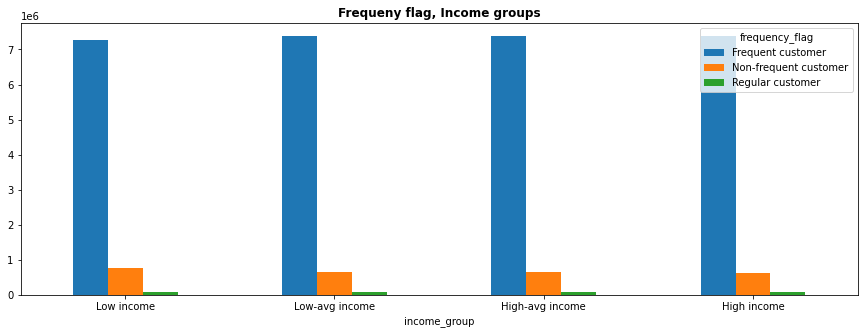

In [60]:
act_inc = inc_activity.plot.bar(rot = 0)
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Frequeny flag, Income groups', fontweight = 'bold')
plt.ylabel('')

In [61]:
df_final.loc[(df_final['age'] <= 30) & (df_final['number_of_kids'] > 0), 'parent_group'] = 'Young parent'
df_final.loc[(df_final['age'] > 30) & (df_final['number_of_kids'] > 0), 'parent_group'] = 'Regular parent'
df_final.loc[(df_final['number_of_kids'] == 0), 'parent_group'] = 'Without dependents'

In [62]:
df_final['parent_group'].value_counts()

Regular parent        19349233
Without dependents     8096275
Young parent           4954224
Name: parent_group, dtype: int64

### Sales Comparison between Genders based on Departments

In [63]:
gender_spenditure = pd.crosstab(df_final['gender'], df_final['department'])

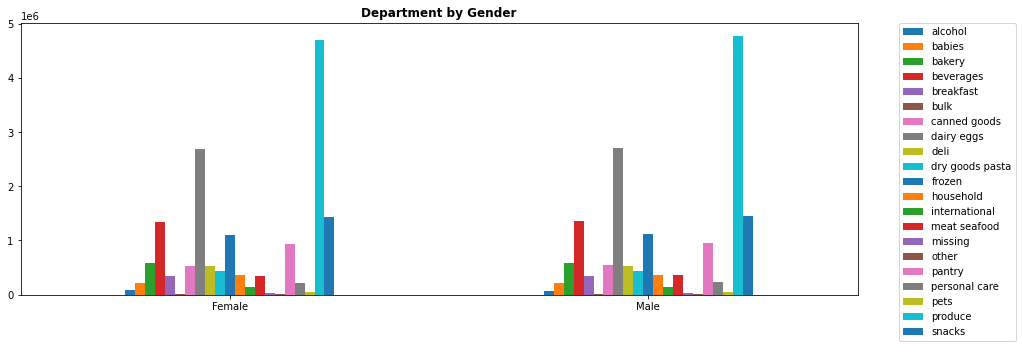

In [64]:
gen_spend = gender_spenditure.plot.bar(rot=0)
plt.rcParams['figure.figsize'] = [5, 10]
plt.title('Department by Gender', fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [65]:
df_final.columns, "", df_final.shape

(Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
        'order_hour_of_day', 'days_since_prior_order', 'product_id',
        'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
        'department_id', 'prices', 'price_range_loc', 'busiest_day',
        'busiest_days', 'busiest_period_of_day', 'loyalty_flag', 'max_orders',
        'average_spend', 'spender_flag', 'user_median', 'frequency_flag',
        'gender', 'state', 'age', 'date_joined', 'number_of_kids',
        'family_status', 'income', 'region', 'exclusion_flag', 'age_range',
        'department', 'Family_size', 'income_group', 'parent_group'],
       dtype='object'),
 '',
 (32399732, 37))

# Importing the visualizations

In [66]:
gen_spend.figure.savefig(os.path.join(path_visualizations, '4_10_bar_gen_spend.png'),dpi=300, bbox_inches = "tight")

In [67]:
act_inc.figure.savefig(os.path.join(path_visualizations, '4_10_bar_act_inc.png'),dpi=300, bbox_inches = "tight")

In [68]:
inc.figure.savefig(os.path.join(path_visualizations, '4_10_bar_inc_prices.png'),dpi=300, bbox_inches = "tight")

In [69]:
price_region.figure.savefig(os.path.join(path_visualizations, '4_10_bar_price_region.png'),dpi=300, bbox_inches = "tight")

In [70]:
region_income.figure.savefig(os.path.join(path_visualizations, '4_10_bar_region_income.png'),dpi=300, bbox_inches = "tight")

In [71]:
region_dept.figure.savefig(os.path.join(path_visualizations, '4_10_bar_region_dept.png'),dpi=300, bbox_inches = "tight")

In [72]:
bars.figure.savefig(os.path.join(path_visualizations, '4_10_bar_summary.png'),dpi=300, bbox_inches = "tight")

size_dept.figure.savefig(os.path.join(path_visualizations, '4_10_bar_family_size_dept.png'),dpi=300, bbox_inches = "tight")

In [73]:
age_size_hour.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_family_size_hour.png'),dpi=300, bbox_inches = "tight")

In [74]:
age_size_day.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_family_size_day.png'),dpi=300, bbox_inches = "tight")

In [75]:
age_days.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_days.png'),dpi=300, bbox_inches = "tight")

In [76]:
age_dept.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_dept.png'),dpi=300, bbox_inches = "tight")

In [77]:
age_spend.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_price_range.png'),dpi=300, bbox_inches = "tight")

In [78]:
barh_age_region.figure.savefig(os.path.join(path_visualizations, '4_10_bar_age_region.png'),dpi=300, bbox_inches = "tight")

In [80]:
df_final.to_pickle(os.path.join(path_prepared, 'instacart_data_set.pkl'))

In [81]:
print(time.time() - start_time)

962.2012012004852


In [83]:
print((time.time() - start_time)/60)

16.037474727630617
